In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy as sp
import math

## File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

### Filename identifiers

<b>Modality</b> (01 = full-AV, 02 = video-only, 03 = audio-only).

<b>Vocal channel</b> (01 = speech, 02 = song).

<b>Emotion</b> (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

<b>Emotional</b> intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

<b>Statement</b> (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

<b>Repetition</b> (01 = 1st repetition, 02 = 2nd repetition).

<b>Actor</b> (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: <b>03-01-06-01-02-01-12.wav</b>

Audio-only (03) <br>
Speech (01) <br>
Fearful (06) <br>
Normal intensity (01) <br>
Statement "dogs" (02) <br>
1st Repetition (01) <br>
12th Actor (12) <br>
Female, as the actor ID number is even. <br>

# Loading 1 File for experimentation

In [2]:
# Load one audio file
audio_file = 'Dataset/archive/Actor_01/03-01-06-02-02-01-01.wav'


In [3]:
ipd.Audio(audio_file)

In [4]:
import numpy as np
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

In [5]:
audio , sr= librosa.load(audio_file)

In [6]:
# audio file as mono
audio

array([ 1.6753264e-02,  3.2214399e-02,  3.2907028e-02, ...,
       -1.2891392e-06, -9.5493454e-07,  0.0000000e+00], dtype=float32)

In [7]:
# Sampling rate
sr

22050

In [8]:
# Number of samples
audio.size 

87553

In [9]:
sample_duration = 1/sr
print("Duration of 1 sample:", sample_duration)

Duration of 1 sample: 4.5351473922902495e-05


In [10]:
# Duration of audio signals in seconds
duration = sample_duration * len(audio)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 3.97 seconds


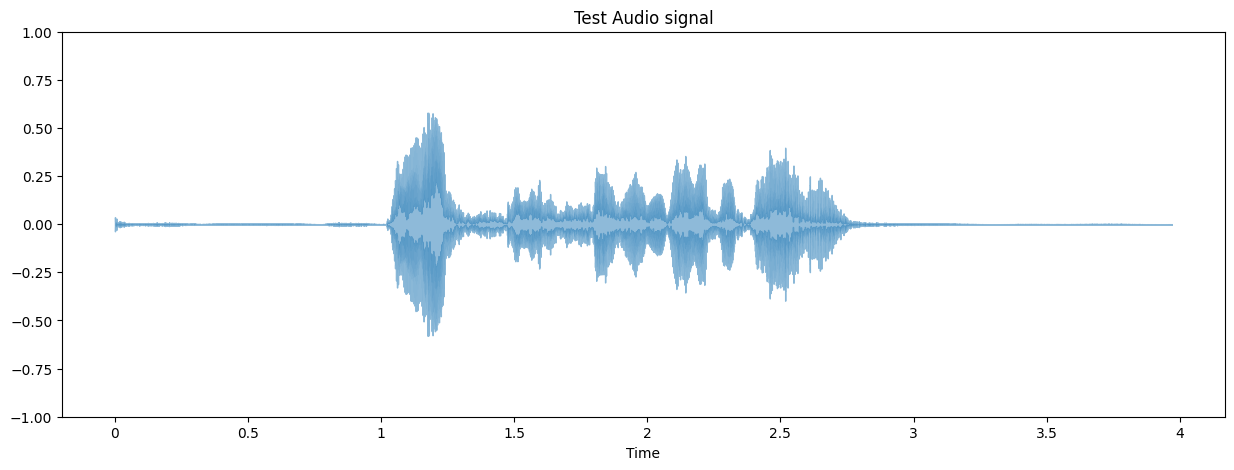

In [11]:
# Visualize waveforms
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, alpha=0.5)
plt.title("Test Audio signal")
plt.ylim((-1, 1))  # Correct range for waveforms

plt.show()



## Calculating Amplitude Envelope

In [12]:
# Calculate amplitude envelope (non overlapping frames)
def amplitude_envelope_non_overlapping(signal, frame_size):
    amplitude_envelope = []

    # Calculate AE for each frames
    for i in range(0, len(signal), frame_size):
        current_frame_amplitude = max(signal[i: i+frame_size]) # max amplitude of all samples in a given frame
        amplitude_envelope.append(current_frame_amplitude)
    
    return np.array(amplitude_envelope)


In [13]:
FRAME_SIZE = 1024
ae_audio = amplitude_envelope_non_overlapping(audio, FRAME_SIZE)
len(ae_audio)

86

In [14]:
# Calculate amplitude envelope (overlapping frames)
def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []

    # Calculate AE for each frames
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude = max(signal[i: i+frame_size]) # max amplitude of all samples in a given frame
        amplitude_envelope.append(current_frame_amplitude)
    
    return np.array(amplitude_envelope)

In [15]:
FRAME_SIZE = 512
HOP_LENGTH = 512
ae_audio = amplitude_envelope(audio, FRAME_SIZE, HOP_LENGTH)
len(ae_audio)

172

In [16]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i : i+frame_size]) for i in range(0, signal.size, hop_length)])

ae_audio = fancy_amplitude_envelope(audio, FRAME_SIZE, HOP_LENGTH)
len(ae_audio)

172

In [17]:
frames = range(0, ae_audio.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

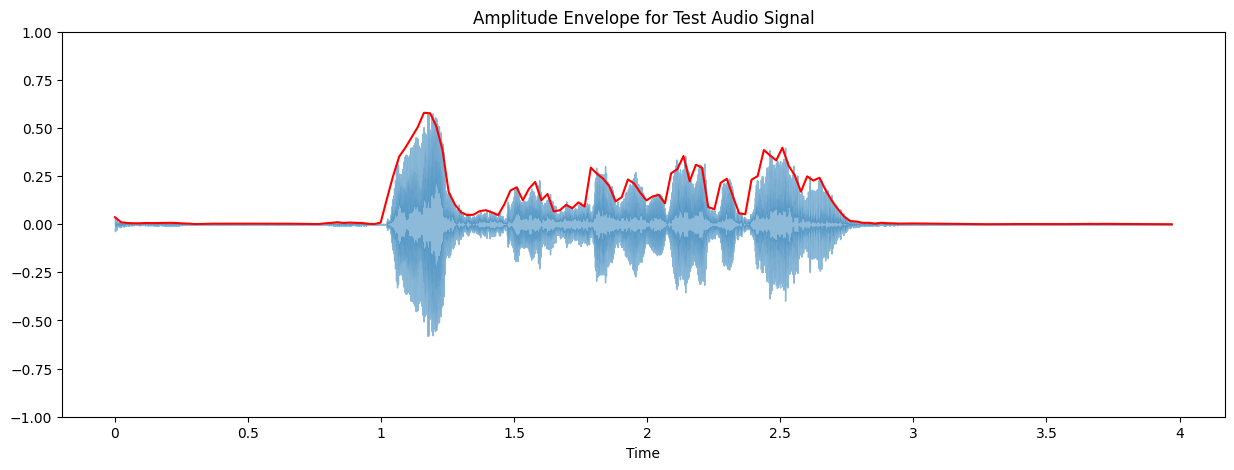

In [18]:
# Visualize Audio Envelope for sample audio
# Visualize waveforms
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, alpha=0.5)
plt.plot(t, ae_audio, color = "r")
plt.title("Amplitude Envelope for Test Audio Signal")
plt.ylim((-1, 1))  # Correct range for waveforms

plt.show()

## Calculating Root Mean Square Energy (RMSE)

In [19]:
# extract RMSE with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_audio = librosa.feature.rms(y=audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [20]:
rms_audio.shape

(172,)

In [21]:
frames = range(0, rms_audio.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

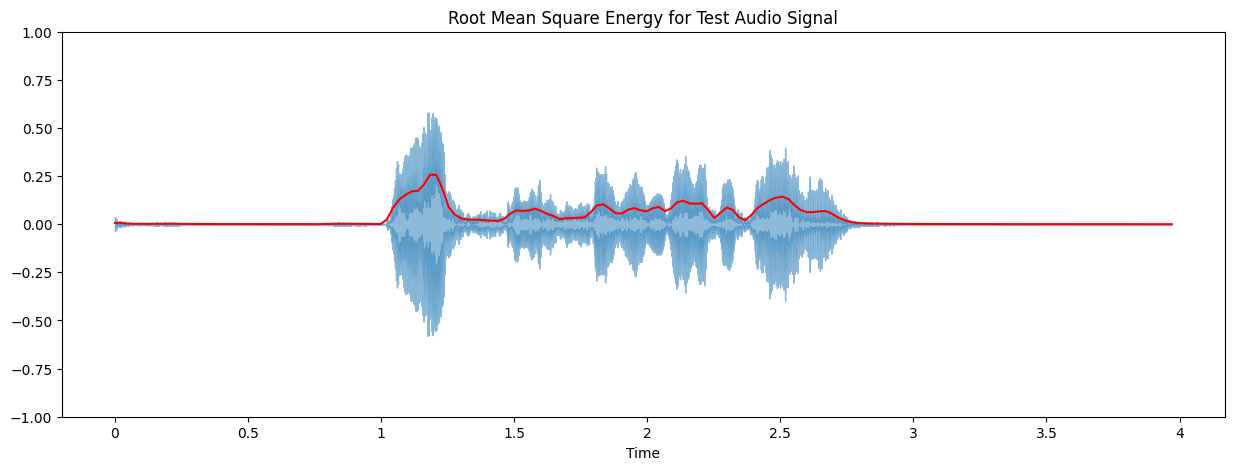

In [22]:
# plot the RMSE for audio
# Visualize waveforms
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, alpha=0.5)
plt.plot(t, rms_audio, color = "r")
plt.title("Root Mean Square Energy for Test Audio Signal")
plt.ylim((-1, 1))  # Correct range for waveforms

plt.show()

In [23]:
# Custom Functiom to calculate RMSE
def rms(signal, frame_length, hop_length):
    rms = []

    for i in range(0 ,len(audio), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length)
        rms.append(rms_current_frame)
    
    return np.array(rms)

In [24]:
rms1_audio = rms(audio, FRAME_LENGTH, HOP_LENGTH)
rms_audio.shape

(172,)

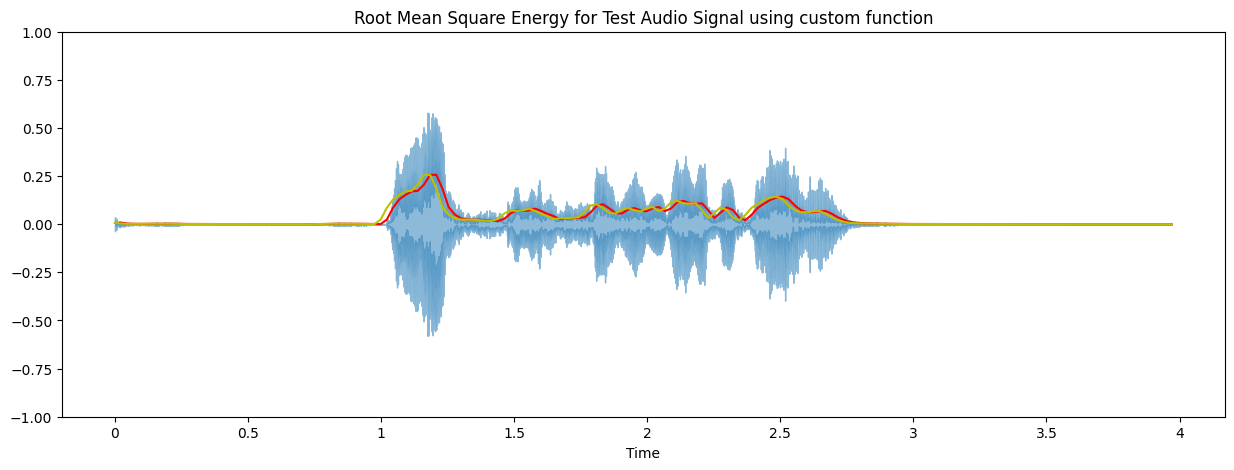

In [25]:
# plot the RMSE for audio
# Visualize waveforms
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, alpha=0.5)
plt.plot(t, rms_audio, color = "r")
plt.plot(t, rms1_audio, color = "y")
plt.title("Root Mean Square Energy for Test Audio Signal using custom function")
plt.ylim((-1, 1))  # Correct range for waveforms

plt.show()

## Calculating Zero-Crossing rate

In [26]:
zcr_audio = librosa.feature.zero_crossing_rate(audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_audio.shape

(172,)

In [27]:
frames = range(0, zcr_audio.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

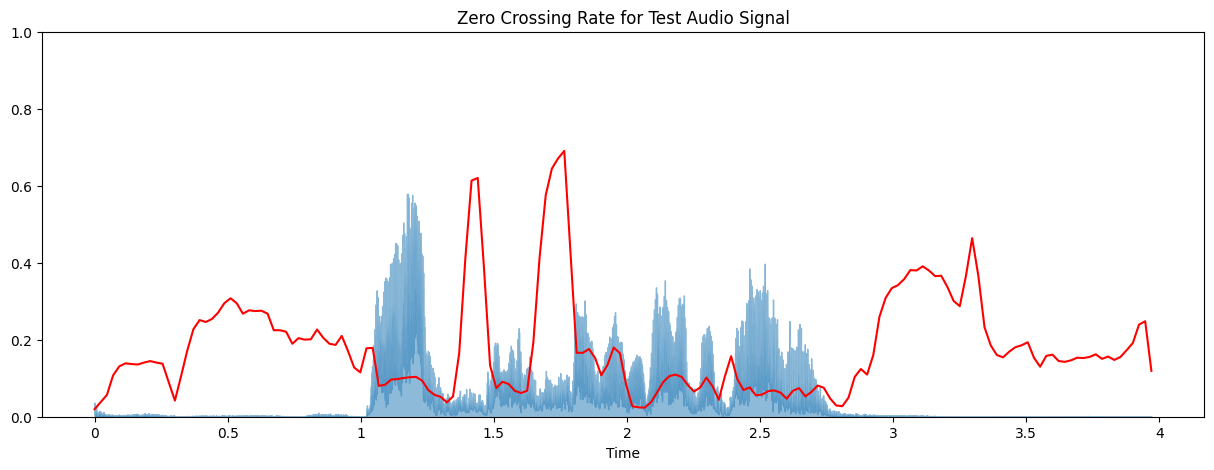

In [28]:
# plot the RMSE for audio
# Visualize waveforms
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, alpha=0.5)
plt.plot(t, zcr_audio, color = "r")
plt.title("Zero Crossing Rate for Test Audio Signal")
plt.ylim((0, 1))  # Correct range for waveforms

plt.show()

## Calculating Fast Fourier Transform

In [29]:
# derive spectrum using FT
ft = sp.fft.fft(audio)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) # between 0 and sampling rate, with intervals eqial to length of magnitude

In [30]:
# Find the dominant frequency
positive_frequency = frequency[:len(magnitude)//2]  # Only positive frequencies
positive_magnitude = magnitude[:len(magnitude)//2]  # Corresponding magnitudes

# Get the peak frequency
peak_index = np.argmax(positive_magnitude)
dominant_frequency = positive_frequency[peak_index]

# Print the dominant frequency
print(f"Dominant Frequency: {dominant_frequency:.2f} Hz")

Dominant Frequency: 278.29 Hz


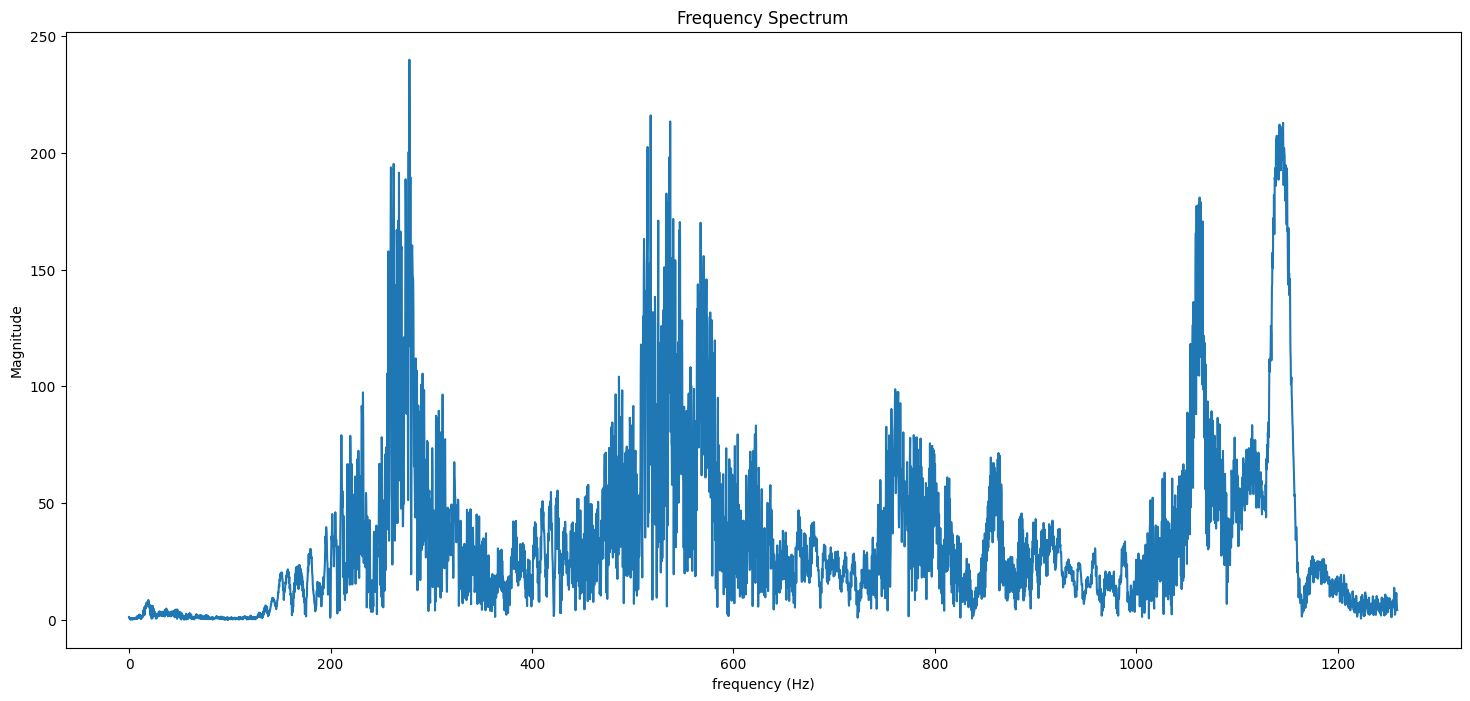

In [31]:
#plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000],magnitude[:5000]) # magnitude spectrum
plt.xlabel("frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.show()

In [32]:
len(audio)

87553

In [33]:
d = 1/sr
d

4.5351473922902495e-05

In [34]:
d_523 = 1/523
d_523

0.0019120458891013384

In [35]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

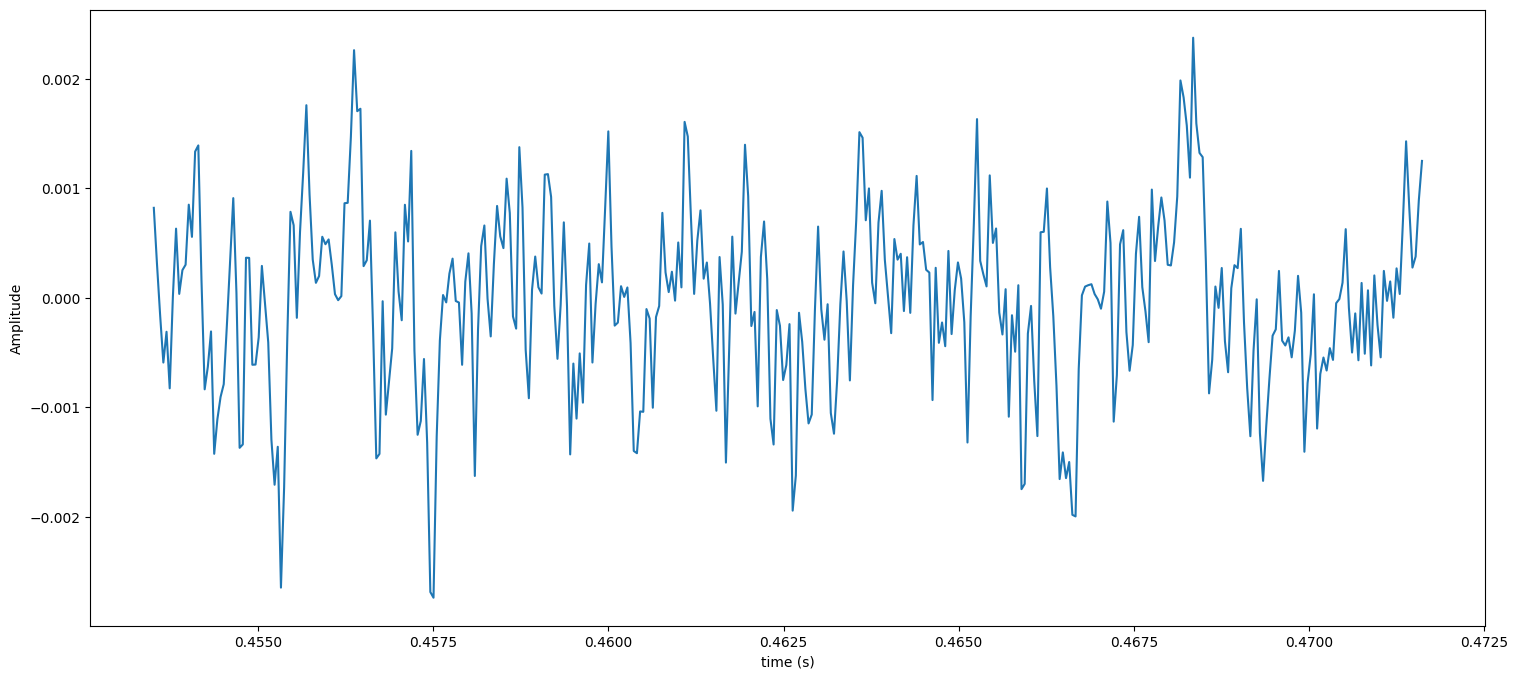

In [36]:
#zoom into the waveform
samples = range(len(audio))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], audio[10000: 10400])
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.show()

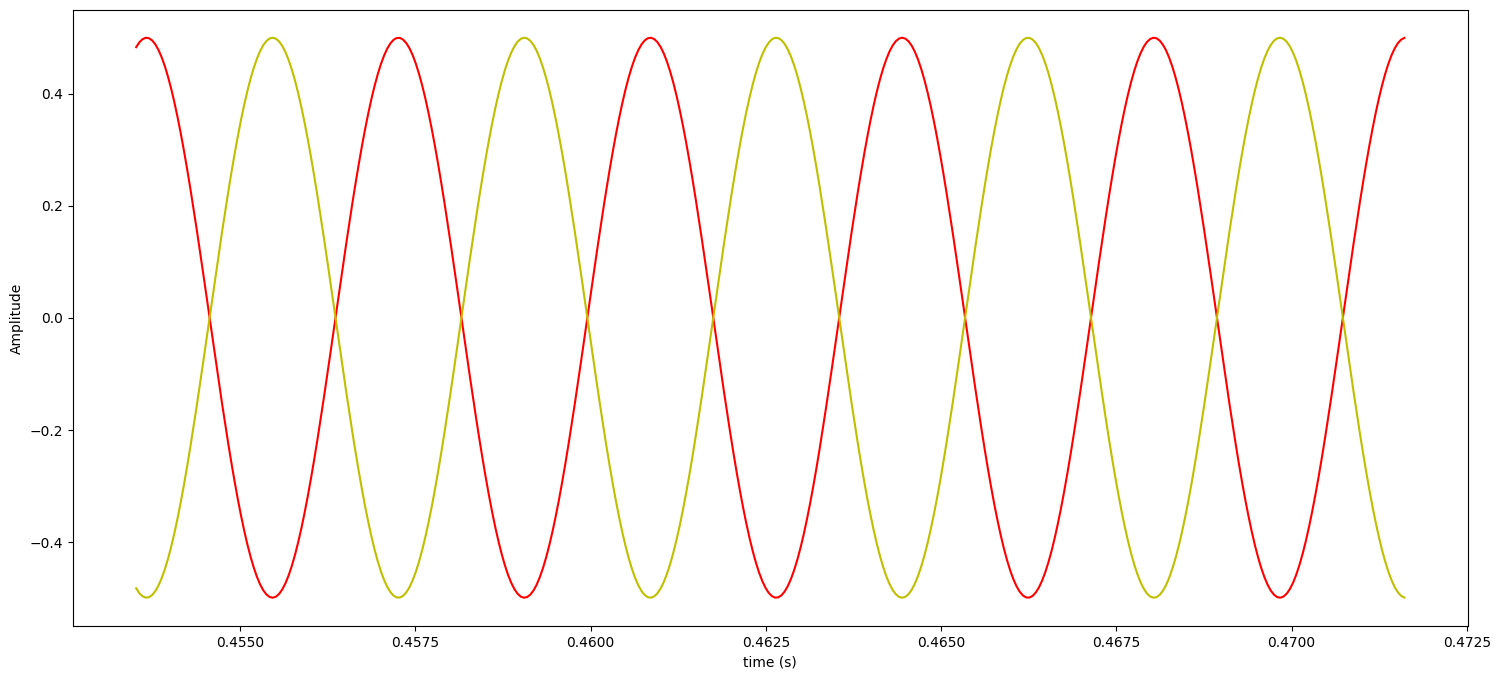

In [37]:
 # Creating sinusoid
f = 278.29
phase = 0
phase2 = 0.5

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color = "r")
plt.plot(t[10000:10400], sin2[10000:10400], color = "y")

plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.show()

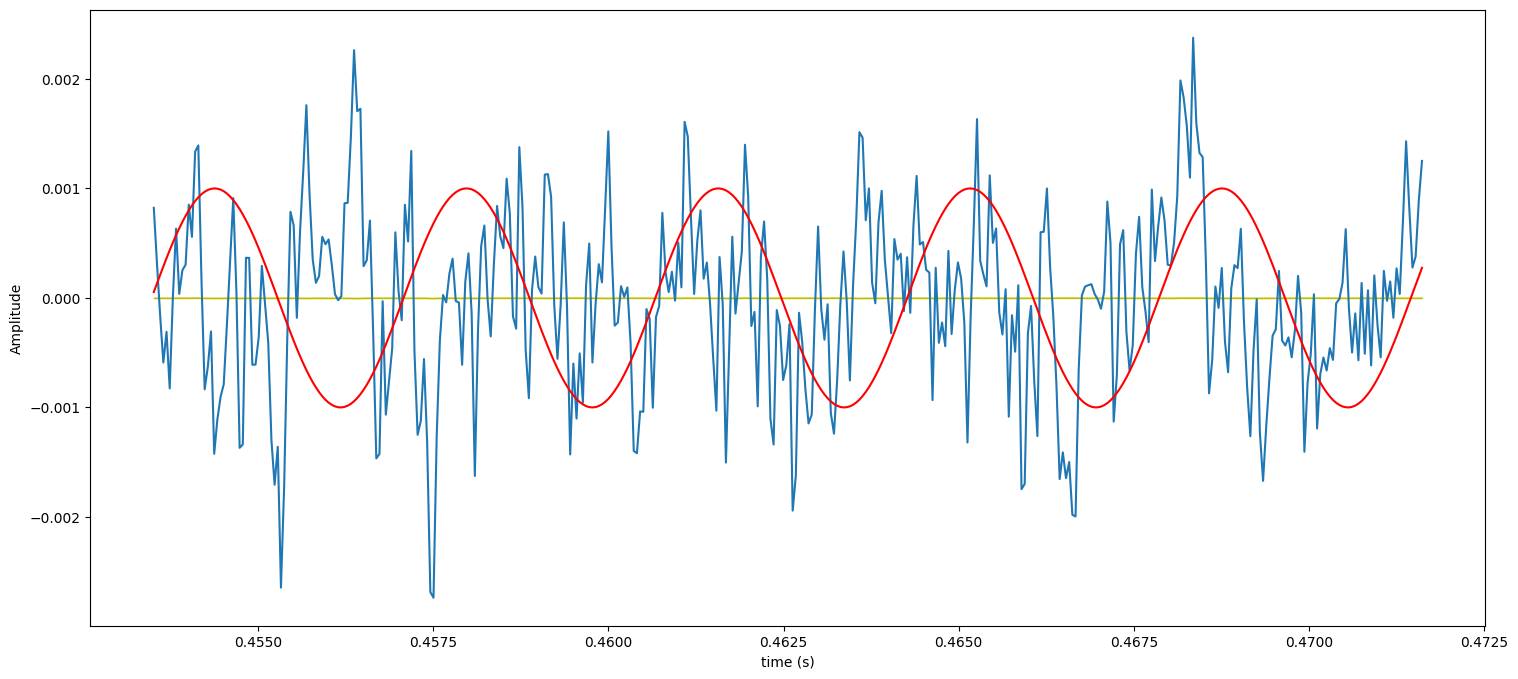

In [38]:
# compare original audio and sinusoids

audio_peak = np.max(np.abs(audio))

samples = range(len(audio))
t = librosa.samples_to_time(samples, sr=sr)

f = 278.29 # Dominant Frequency calculated above
phase = 0.2

sin =  0.001 * np.sin(2*np.pi * (f * t - phase))
# Scale the sine wave to match the peak of the audio


#zoom into the waveform
samples = range(len(audio))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], audio[10000: 10400])
plt.plot(t[10000:10400], sin[10000:10400], color = "r", label="Sinusoid (278.29 Hz)")

# Calculating similarity
plt.fill_between(t[10000:10400], sin[10000:10400]*audio[10000:10400], color = "y")
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.show()

Optimized Amplitude: 0.01
Optimized Frequency: 278.40793864408624
Optimized Phase: 0.15910238286140757


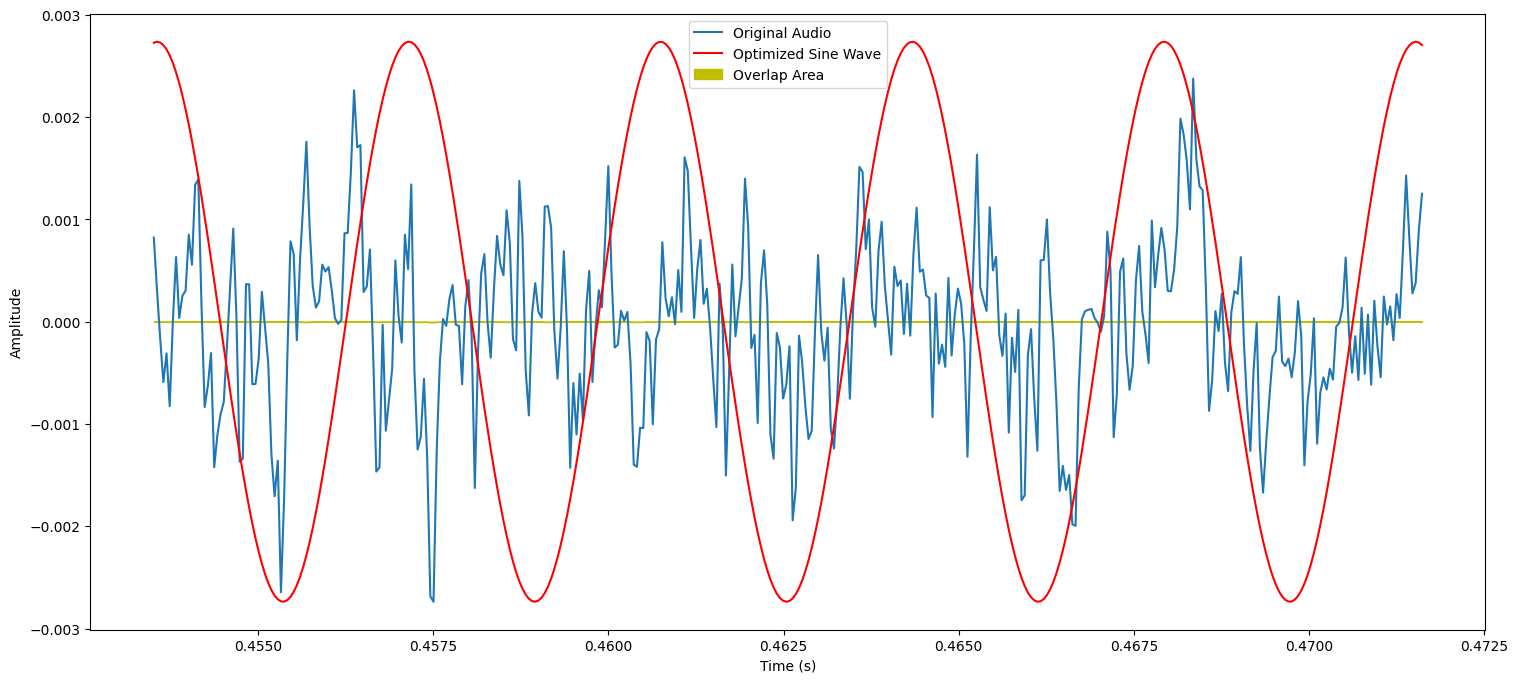

In [39]:
from scipy.optimize import minimize


# Define the similarity function (negative for maximization)
def similarity(params, audio, t):
    A, f, phase = params
    sine_wave = A * np.sin(2 * np.pi * f * t - phase)
    return -np.sum(sine_wave[10000:10400] * audio[10000:10400])  # Negative for maximization

# Initial guesses for amplitude, frequency, and phase
initial_params = [0.001, 278.29, 0.2]  # Amplitude, frequency, phase

# Bounds for amplitude, frequency, and phase
bounds = [(0, 0.01), (250, 300), (0, 2 * np.pi)]  # Reasonable bounds

# Optimize the sine wave parameters
result = minimize(
    similarity, 
    initial_params, 
    args=(audio, t), 
    bounds=bounds, 
    options={'maxiter': 1000}  # Increase iterations for better optimization
)

# Extract the optimized parameters
optimized_A, optimized_f, optimized_phase = result.x
print(f"Optimized Amplitude: {optimized_A}")
print(f"Optimized Frequency: {optimized_f}")
print(f"Optimized Phase: {optimized_phase}")

# Calculate the audio peak in the zoomed-in range
audio_peak_range = np.max(np.abs(audio[10000:10400]))

# Generate the optimized sine wave
best_sine_wave = optimized_A * np.sin(2 * np.pi * optimized_f * t - optimized_phase)

# Scale the sine wave to match the local audio peak
sin_scaled = best_sine_wave * (audio_peak_range / np.max(np.abs(best_sine_wave)))

# Plot the audio and sine wave with overlap area
plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], audio[10000:10400], label="Original Audio")
plt.plot(t[10000:10400], sin_scaled[10000:10400], color="r", label="Optimized Sine Wave")
plt.fill_between(
    t[10000:10400],
    sin_scaled[10000:10400] * audio[10000:10400],
    color="y",
    label="Overlap Area"
)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [40]:
# VIDEO 13 DFT
audio_ft = np.fft.fft(audio)

In [41]:
audio_ft.shape

(87553,)

In [42]:
# real + complex part
audio_ft[0]

(1.210802174991183+9.769962616701378e-15j)

In [43]:
# Taking only magnitude from the FT
magnitude_spectrum_audio = np.abs(audio_ft)

In [44]:
magnitude_spectrum_audio[0]

1.210802174991183

In [45]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

    # plot magnitude spectrum
    plt.figure(figsize=(18, 5))

    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)
    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequency (Hz)")
    plt.title(title)

    plt.show()


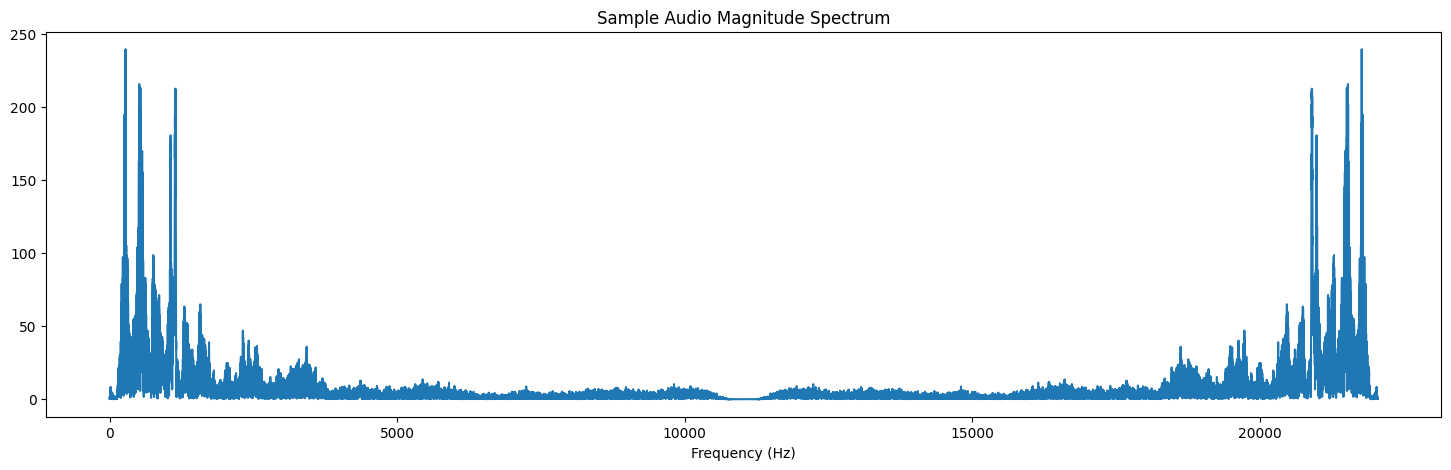

In [46]:
# Plotting entire spectrum to show redundancy
plot_magnitude_spectrum(audio, "Sample Audio Magnitude Spectrum", sr, 1)

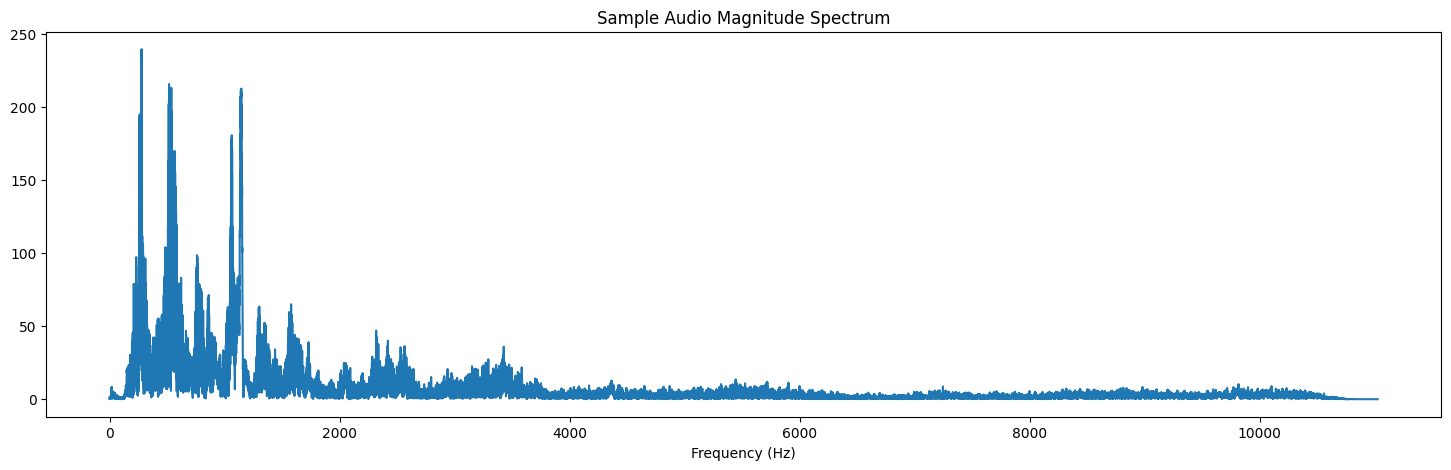

In [47]:
# Plotting half the spectrum only till Nyquist Frequency
plot_magnitude_spectrum(audio, "Sample Audio Magnitude Spectrum", sr, 0.5)

## Extracting Spectrogram using Short Time Fourier Transform

In [48]:
# Defining parameters for STFT
FRAME_SIZE = 2048
HOP_SIZE = 512

In [49]:
audio_scale = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [50]:
# Dimensions are (frequency bins, no. of frames/temporal bins)
# Frequency bins = FRAME_SIZE/2 + 1
audio_scale.shape

(1025, 172)

In [51]:
type(audio_scale[0][0]) # since STFT gives us complex coefficients

numpy.complex64

### Calculating Spectrogram

In [52]:
# Moving from STFT to a spectrogram
Y_scale = np.abs(audio_scale) ** 2

In [53]:
Y_scale.shape

(1025, 172)

In [54]:
type(Y_scale[0][0]) # now float32 because we have moved from a complex to real number by taking magnitude

numpy.float32

In [55]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

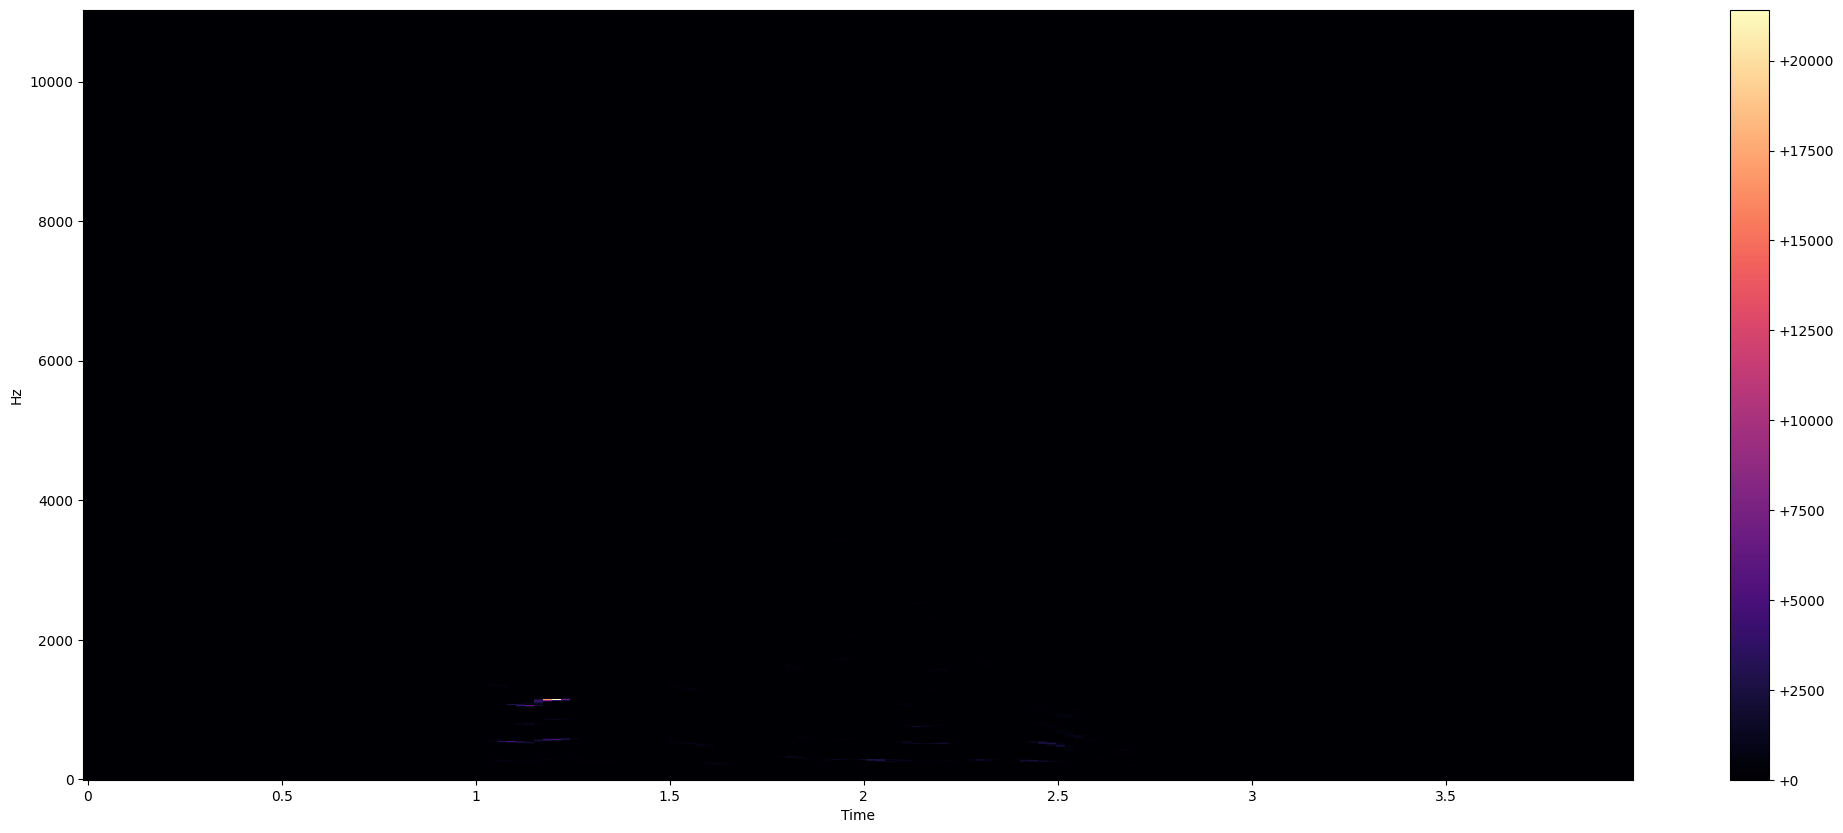

In [56]:
plot_spectrogram(Y_scale, sr, HOP_SIZE) #very little visible because no log scale

### Visualizing a Log-Amplitude Spectrogram 

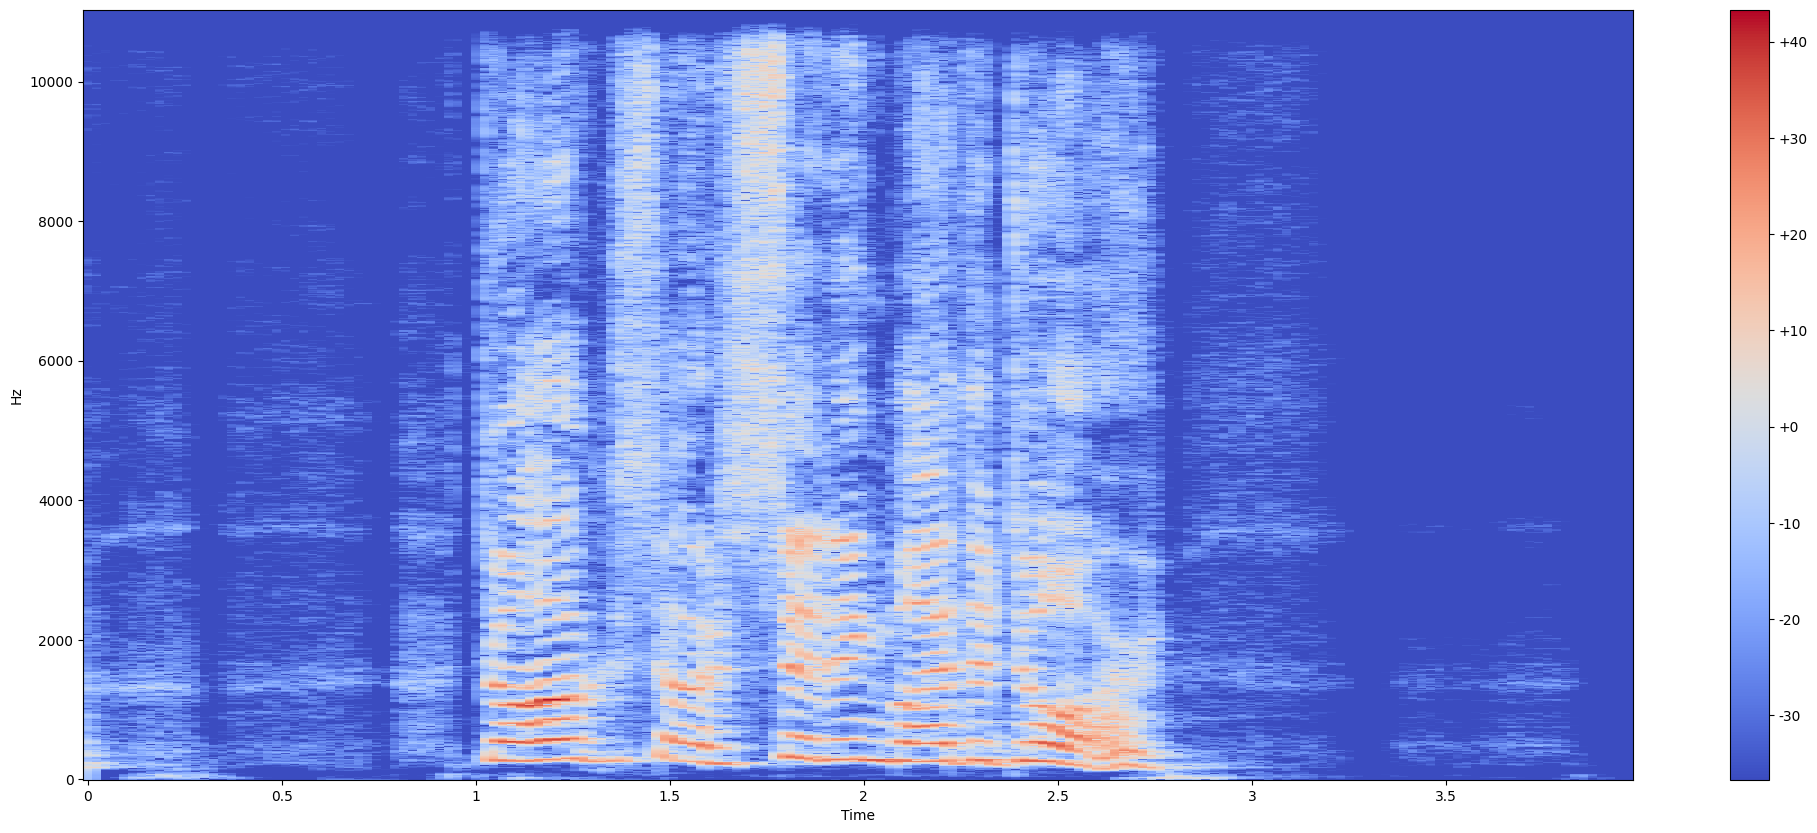

In [57]:
# This is done because we also perceive sound as logarithmic
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

#### Since we perceive frequency as logarithmic too

### Log-Frequency Spectrogram

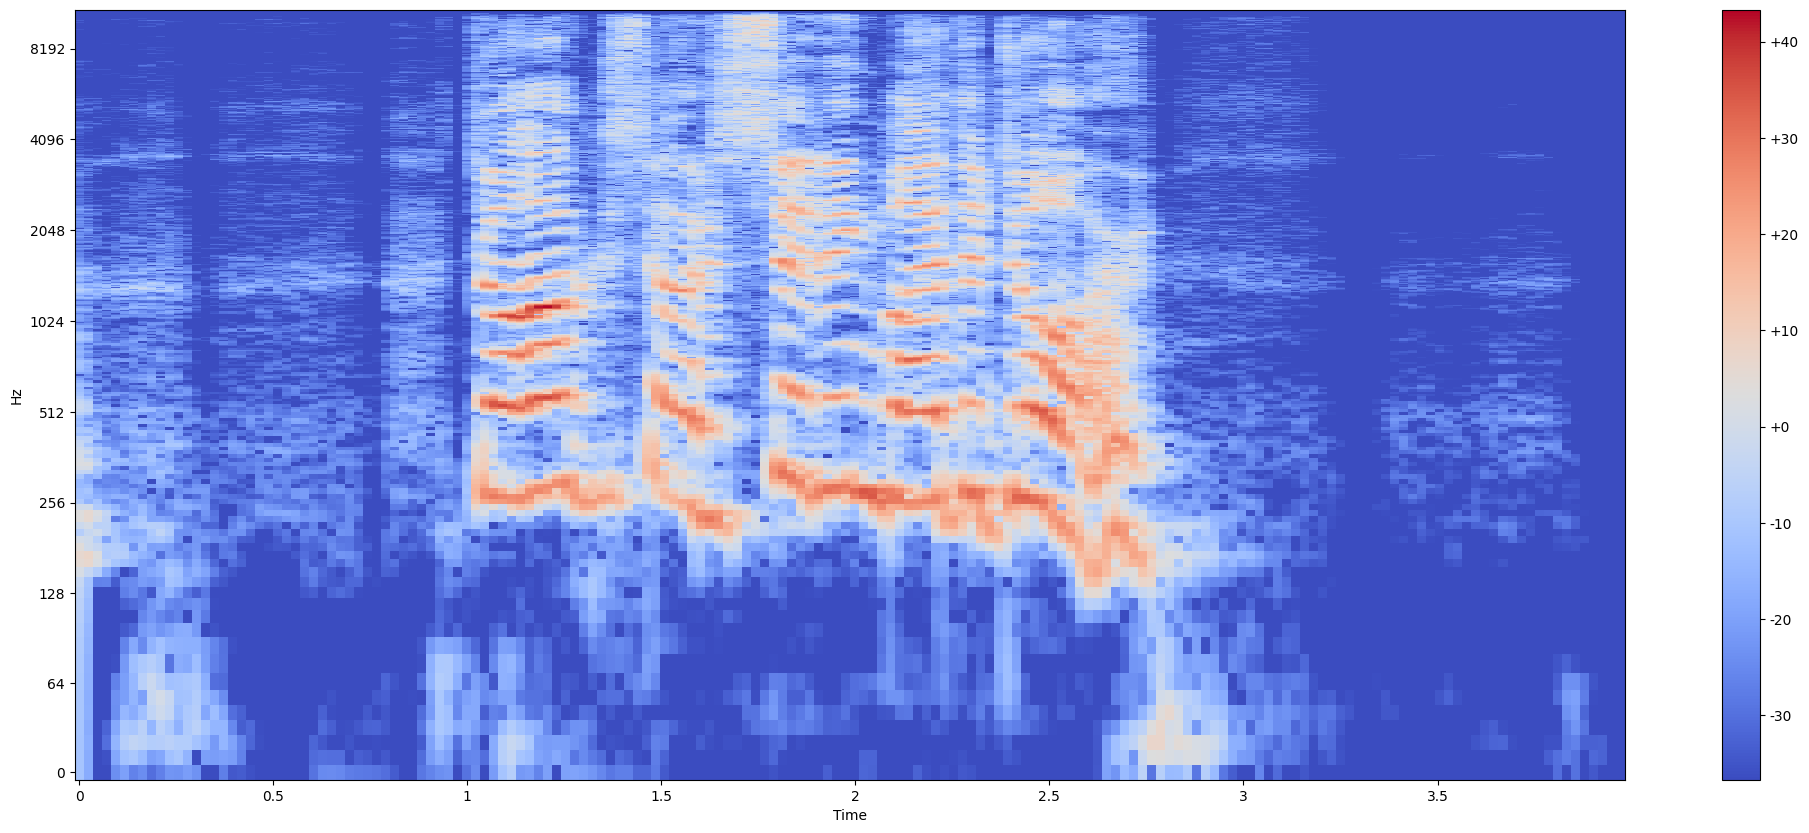

In [58]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

## Mel Spectrograms

### Mel Filter Banks

In [59]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [60]:
filter_banks.shape # (no. of Mel bands, Niquist frequency + 1) 


(10, 1025)

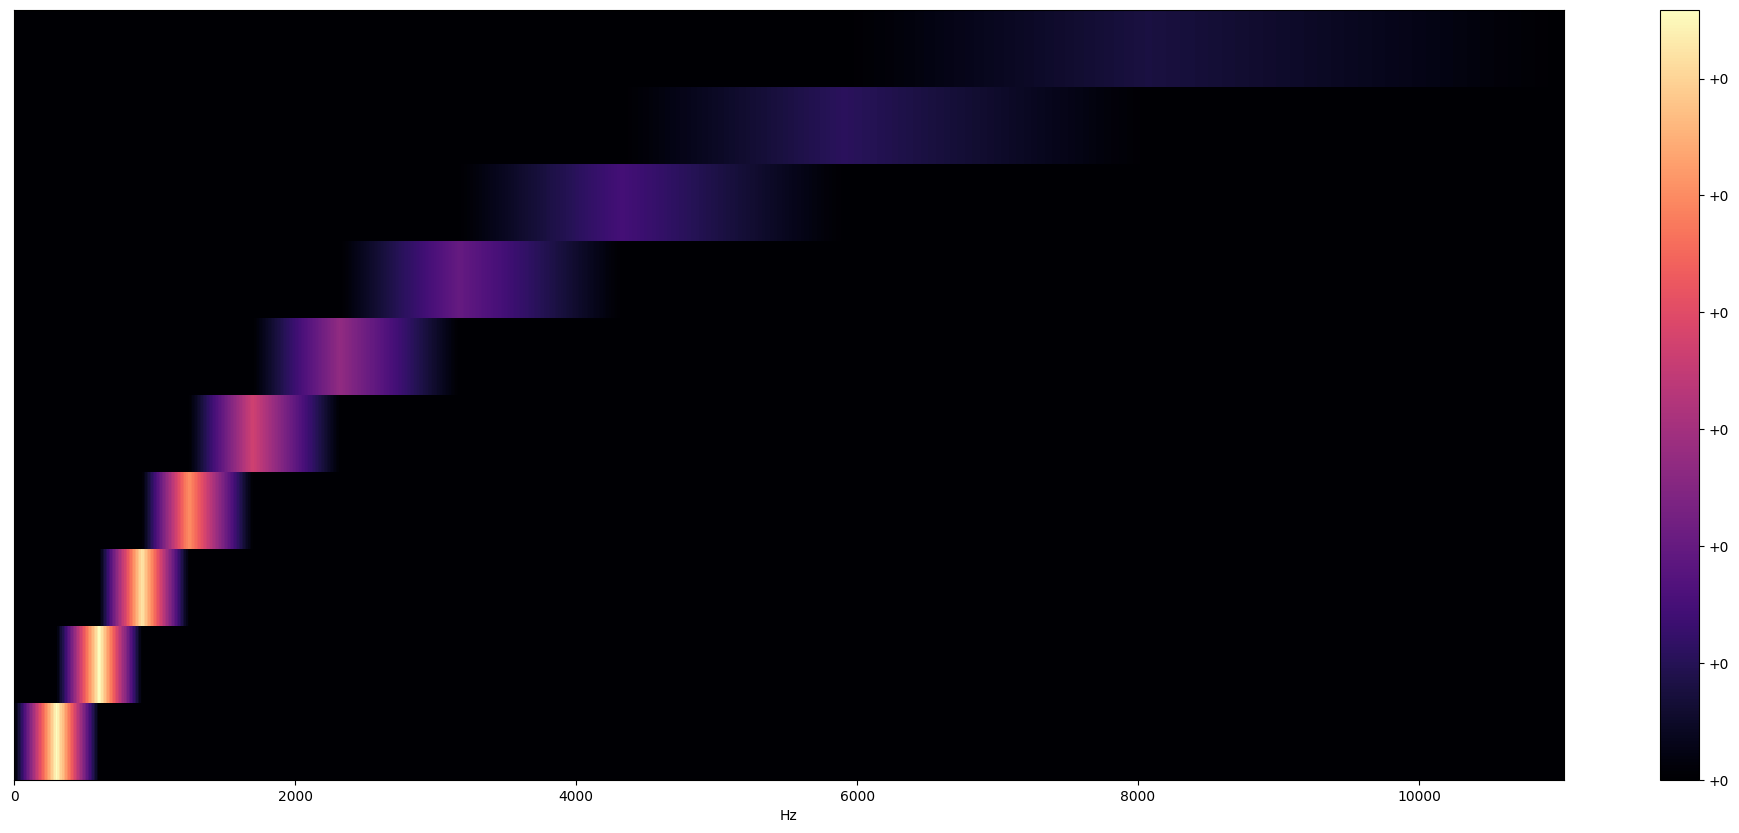

In [61]:
# Visualizing the triangular Mel filter banks
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### Visualizing Mel Spectrogram

In [62]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=90)


In [63]:
mel_spectrogram.shape # (no. of Mel bands, no. of frames/temporal bins)

(90, 172)

In [64]:
# Converting to db
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [65]:
# Still the same shape
log_mel_spectrogram.shape

(90, 172)

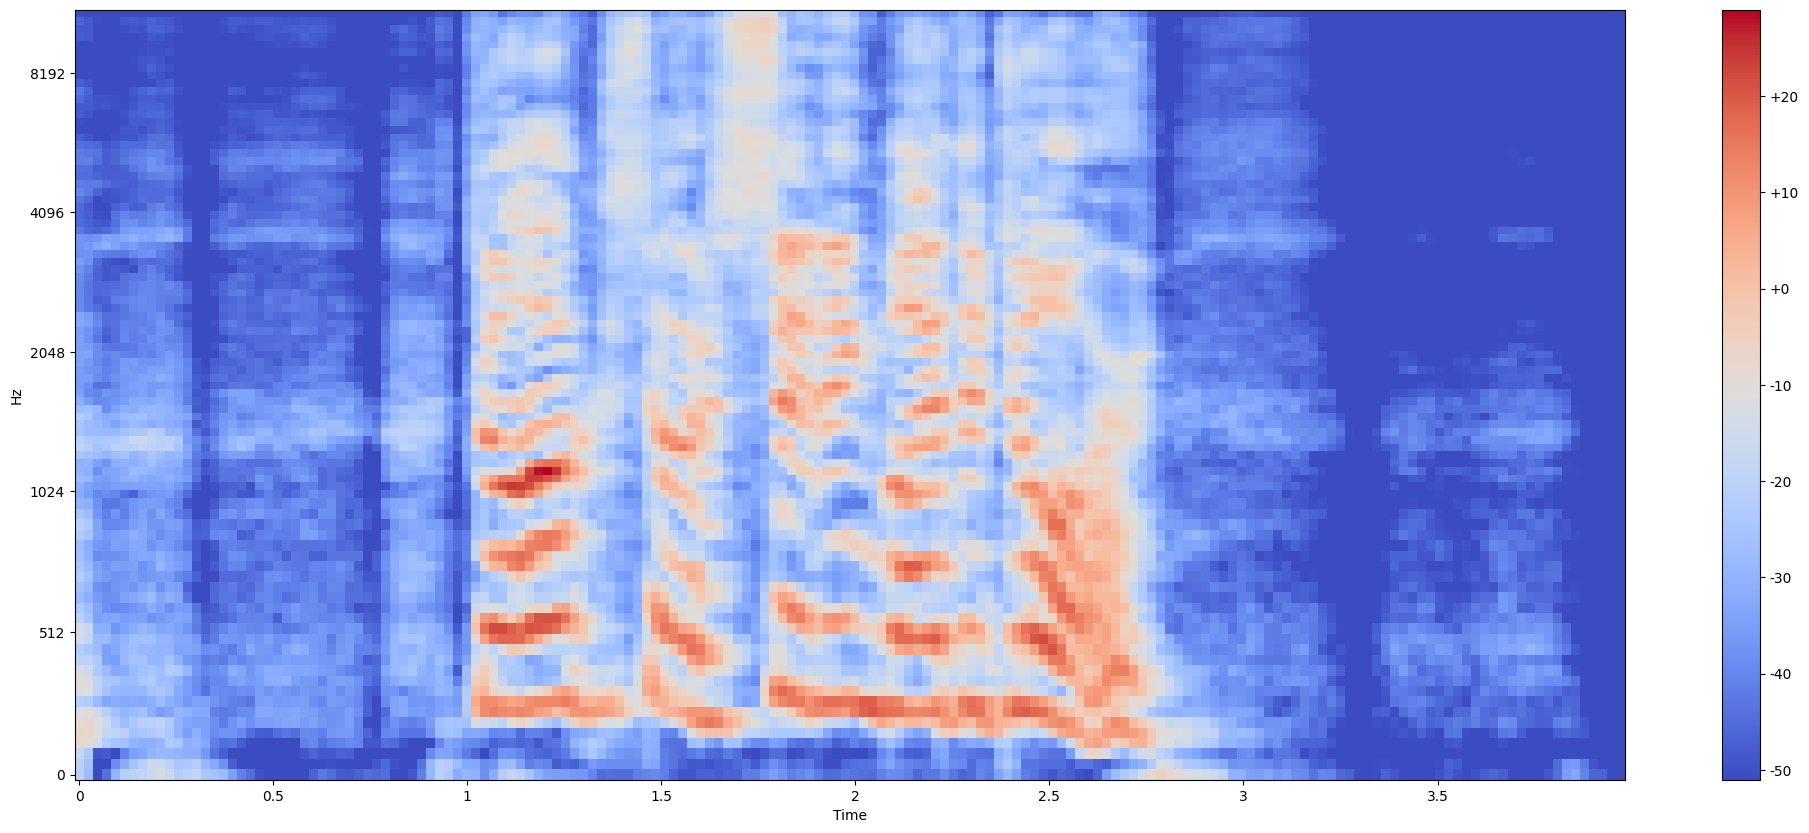

In [66]:
# Plotting Mel Spectrogram
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Extracting Mel-Frequency Cepstral Coefficients

In [68]:
mfccs = librosa.feature.mfcc(y=audio, n_mfcc=13, sr=sr)


In [69]:
mfccs.shape


(13, 172)

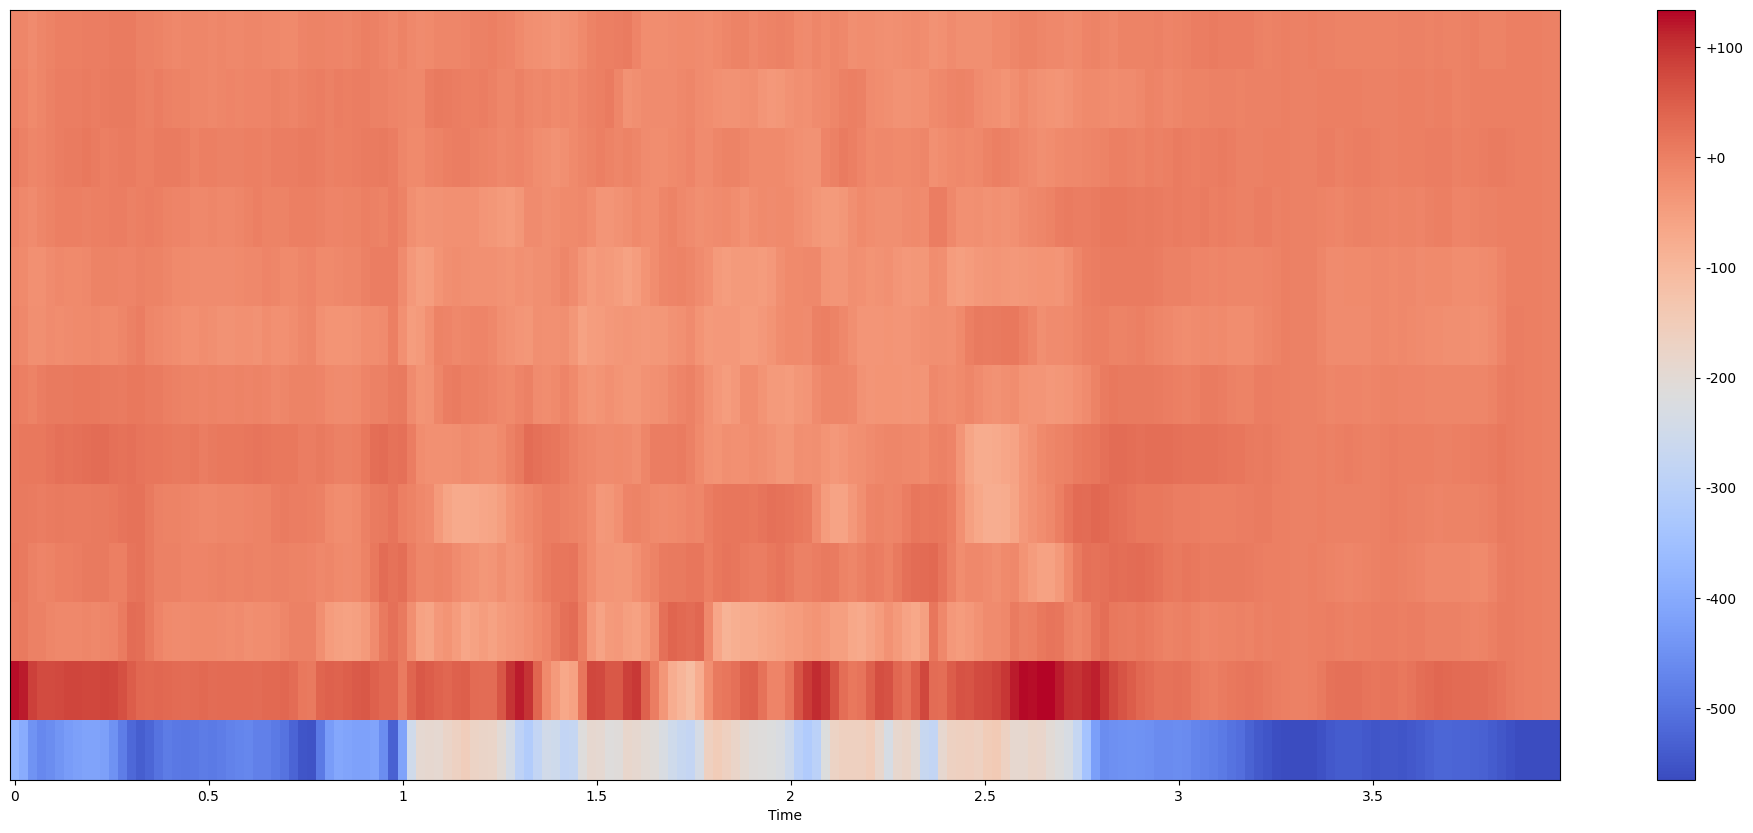

In [70]:
# Visualizing MFCCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### Calculating 1st and 2nd Derivative of MFCCs

In [71]:
delta_mfccs = librosa.feature.delta(mfccs)

In [72]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)


In [73]:
delta_mfccs.shape # same shape


(13, 172)

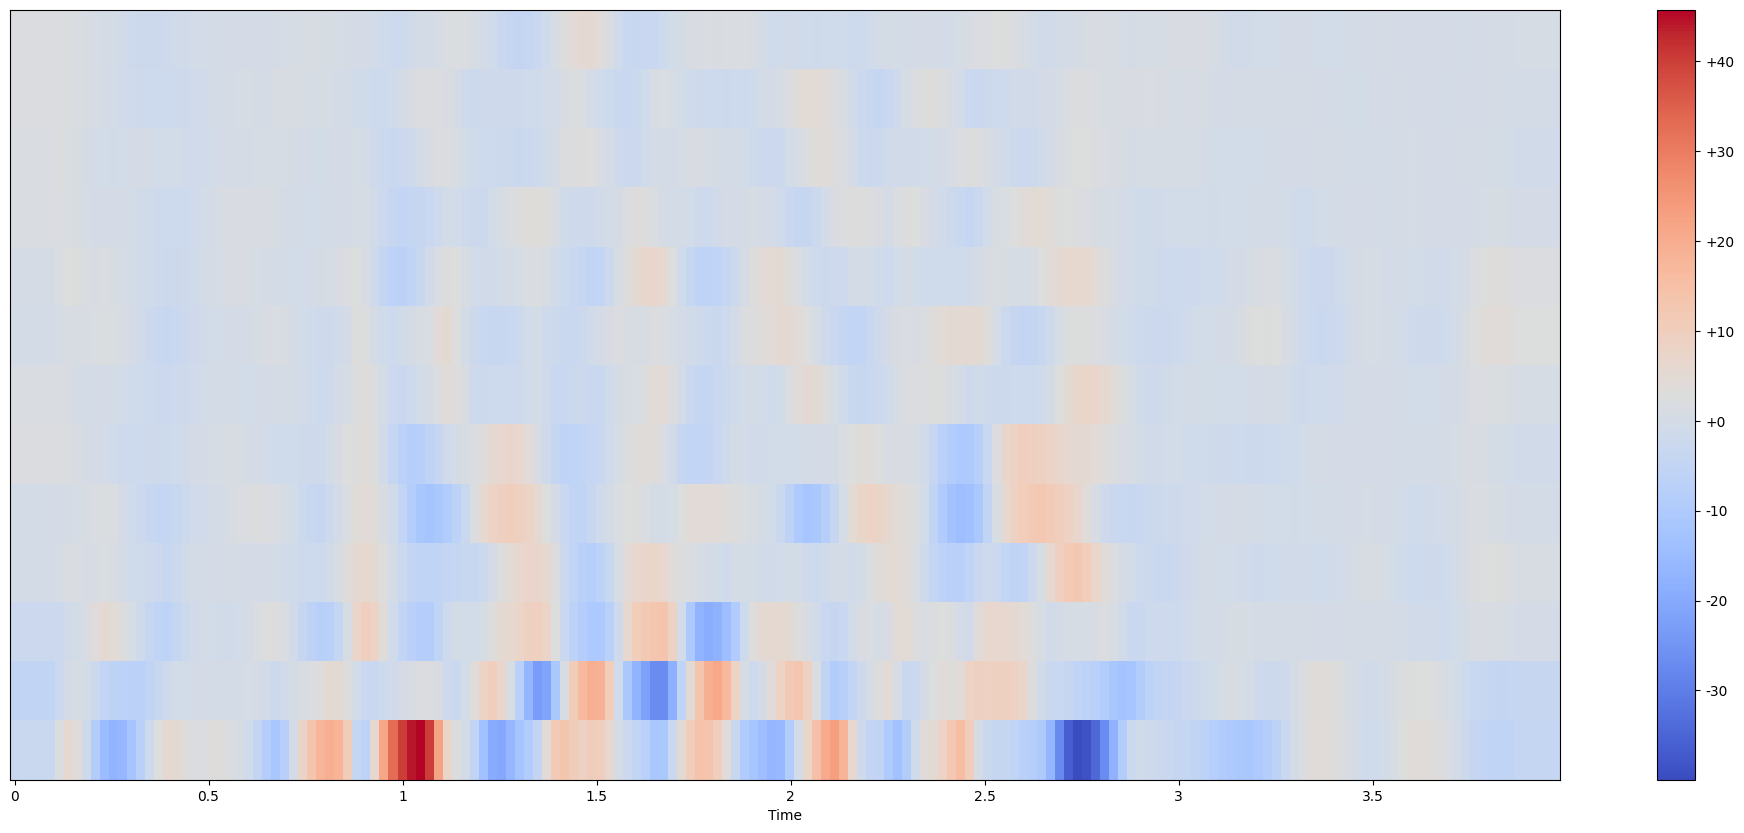

In [74]:
# Visualizing Delta MFCCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

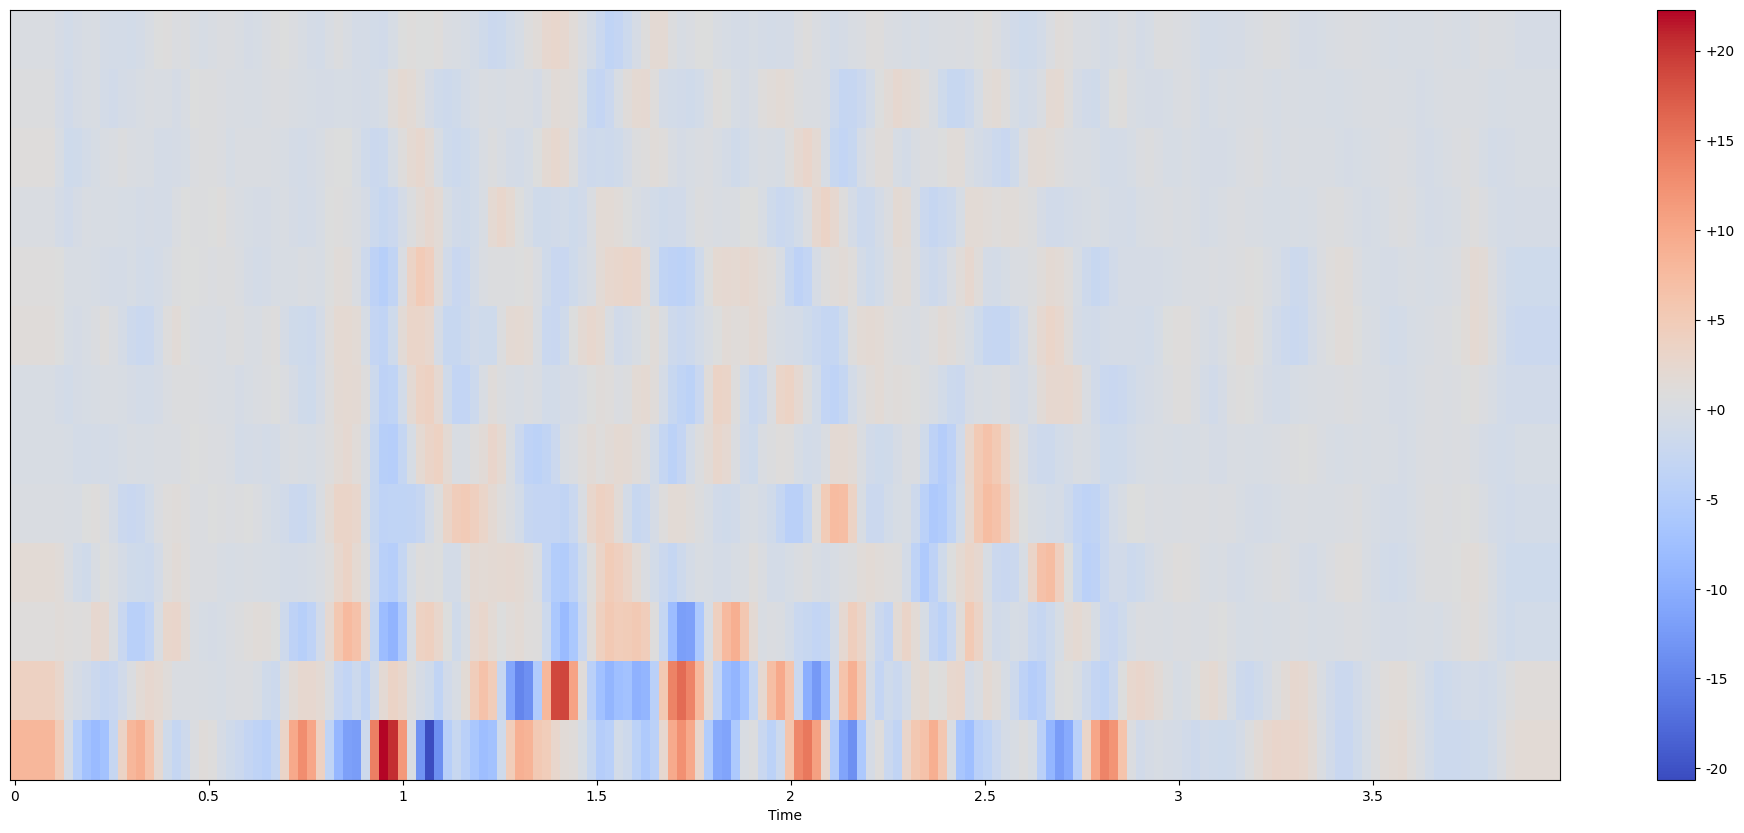

In [75]:
# Visualizing Delta2 MFCCs
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### Concatenating to make a unique feature

In [76]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))


In [77]:
mfccs_features.shape


(39, 172)

## Calculating Band-Energy Ratio

In [78]:
# Defining parameters for STFT
FRAME_SIZE = 2048
HOP_SIZE = 512

audio_spec = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


In [79]:
audio_spec.shape

(1025, 172)

In [85]:
import math

def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [86]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

185

In [87]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [102]:
# Calculating Band Energy Ratio
ber_audio = band_energy_ratio(audio_spec, 2000, sr)


In [103]:
# no. of items in ber_audio
len(ber_audio)


172

### Visualize Band Energy Ratio

In [104]:
frames = range(len(ber_audio))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

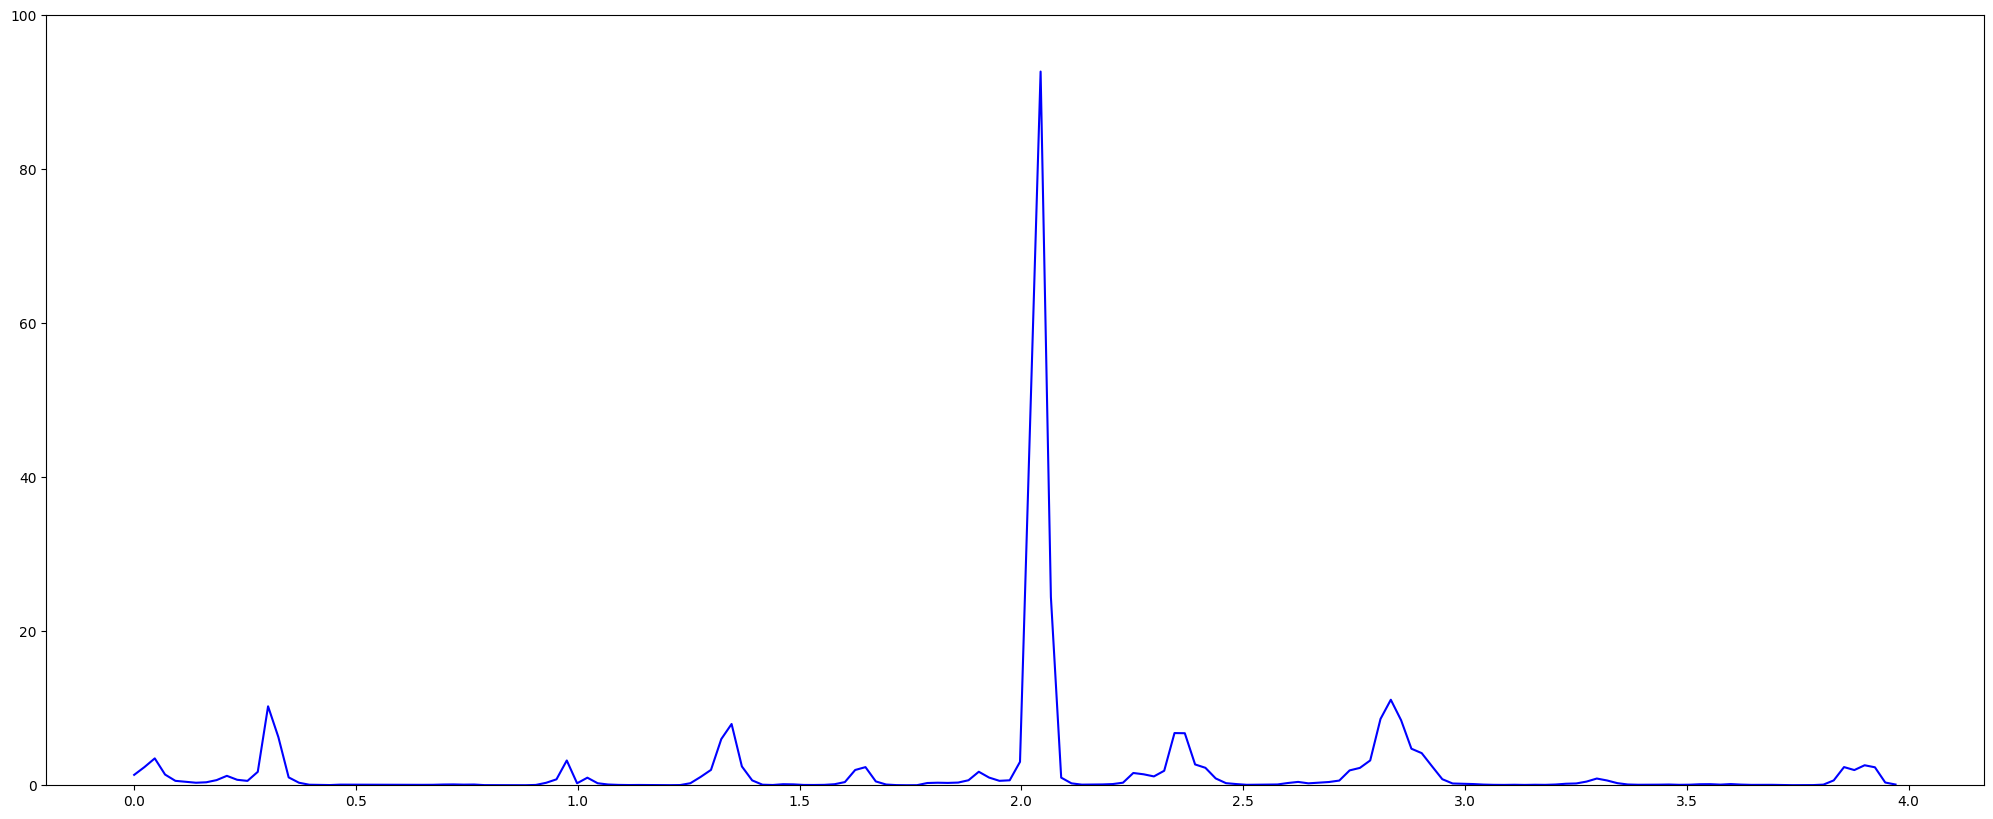

In [105]:
plt.figure(figsize=(25, 10))

plt.plot(t, ber_audio, color="b")
plt.ylim((0, 100))
plt.show()

## Extracting Spectral Centroid

In [106]:
sc_audio = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]


In [107]:
sc_audio.shape


(172,)

### Visualizing Spectral Centroid

In [109]:
frames = range(len(sc_audio))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
len(t)

172

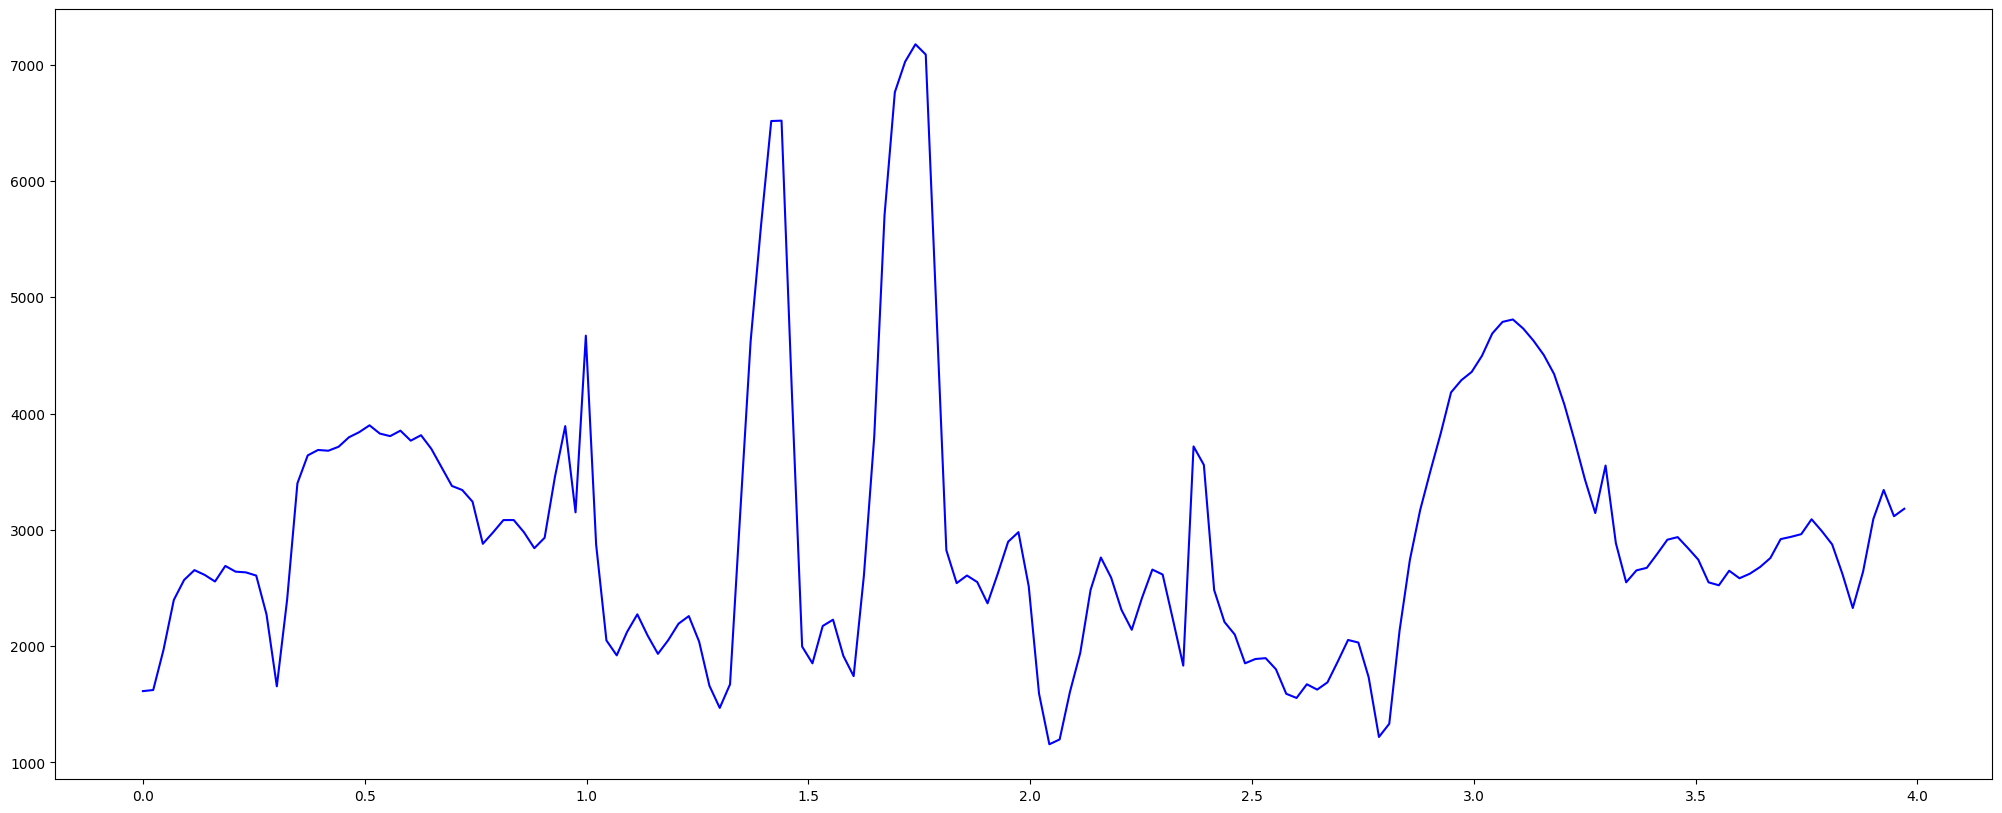

In [110]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_audio, color='b')
plt.show()

## Spectral Bandwith

In [112]:
ban_audio = librosa.feature.spectral_bandwidth(y=audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_audio.shape

(172,)

### Visualizing Spectral Bandwith

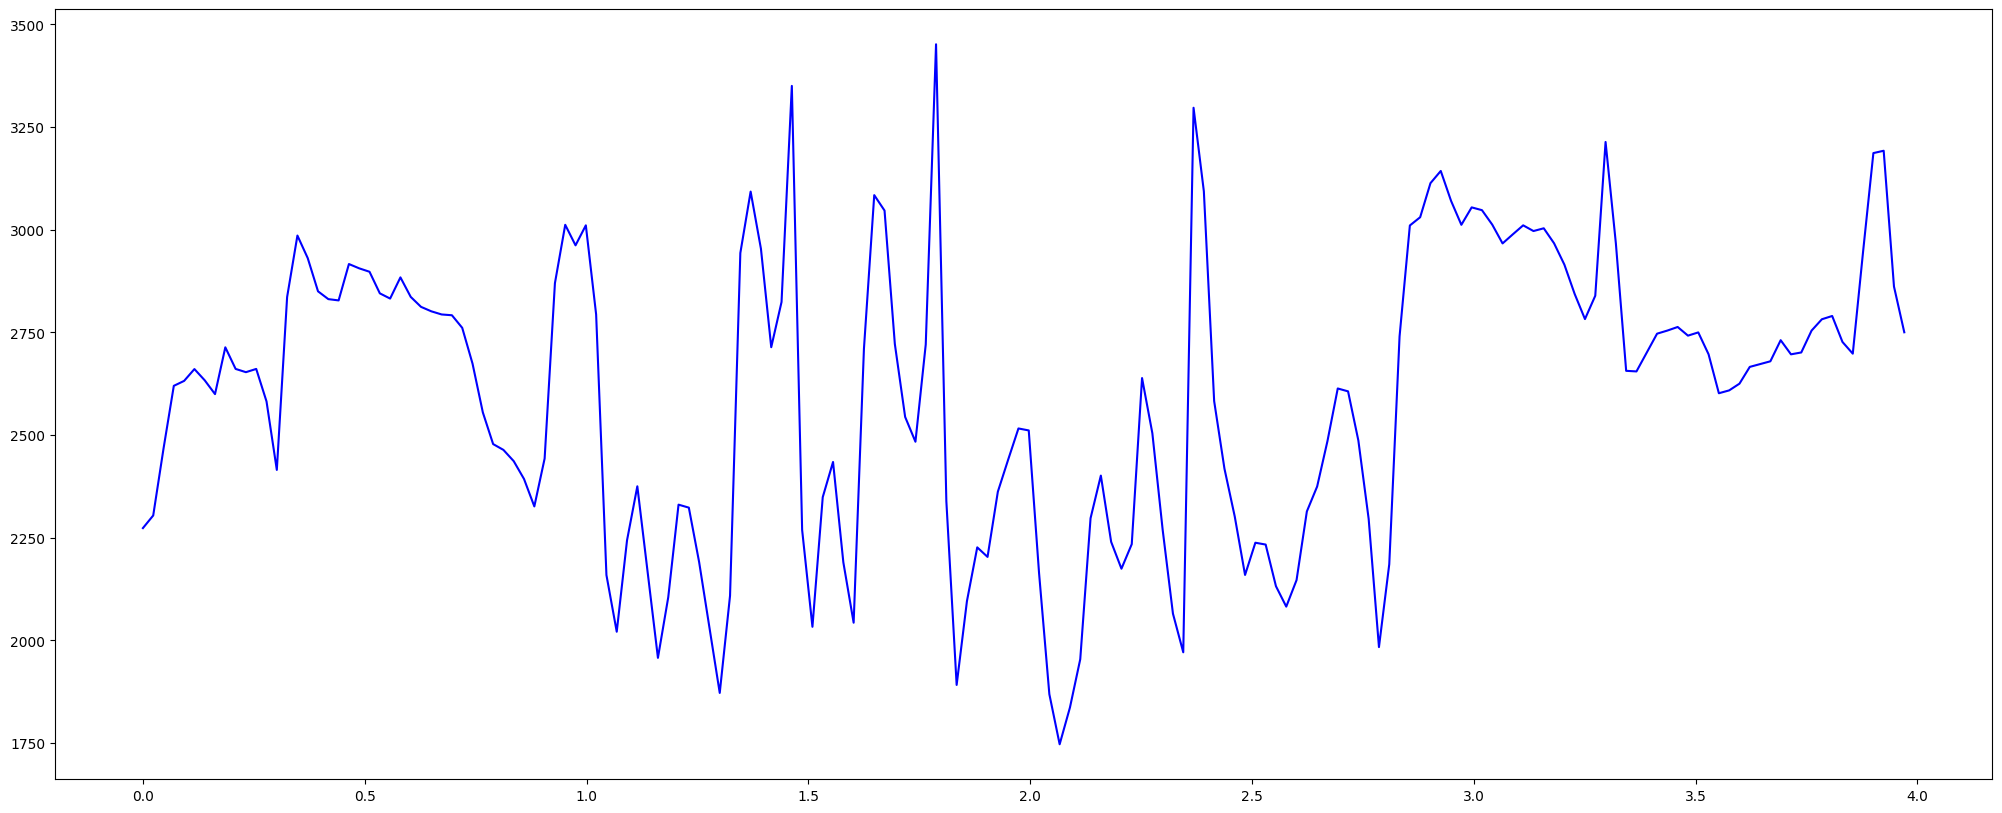

In [113]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_audio, color='b')
plt.show()